# Welcome to Pandas!

Pandas is a library in Python that makes dealing with data a breeze. Ever had to juggle a lot of information for a school project? Pandas is just like that, but it handles the juggling for you!

Imagine you have a table with student names, their favorite subjects, and their hobbies. With pandas, you can easily sort, filter, and analyze this data. Want to find all students who like Math and also play guitar? No problem! Pandas has got you covered.

In short, pandas is like a powerful data organizing tool, right inside your Python code. Ready to dive in? Let's go!

# Data Structures

## Series
A `Series` in pandas is like a list in Python, but with some superpowers! Let's imagine that you have a list of grades, like this:

In [ ]:
grades = [93, 73, 88, 99, 82]

This is just a simple Python list. But when we turn it into a pandas Series, we get some extra benefits. We can create labels for each grade. This is a bit like having a list where each item also has a special sticky note attached to it which can be used for additional information:

In [ ]:
import pandas as pd

# index provides a label for each item.
grades = pd.Series([85, 90, 78, 92, 88], index=["Math", "Science", "English", "History", "Art"], name='grades')
grades

Math       85
Science    90
English    78
History    92
Art        88
Name: grades, dtype: int64

Each grade is now labeled with a subject! Neat, right?

## DataFrame
Now, let's step up from a `Series` to a `DataFrame`. If a `Series` is a list with superpowers, then a `DataFrame` is a bunch of those superpowered lists stuck together. It's similar to an Excel spreadsheet or a table with rows and columns.

Let's consider you have data for students' grades in different subjects:


In [ ]:
import pandas as pd
import numpy as np

# grades_matrix holds the grade values, students is a list of student names
grades_matrix = np.random.randint(70, 100, size=(5, 5))

students = ['Amy', 'Bob', 'Charlie', 'David', 'Ella']
subjects = ["English", "Math", "History", "Science", "Art"]

# Create a DataFrame
grades_df = pd.DataFrame(grades_matrix, index=students, columns=subjects)
grades_df

,English,Math,History,Science,Art
Amy,70,88,78,96,81
Bob,71,89,89,92,73
Charlie,76,73,79,85,70
David,99,89,82,87,90
Ella,96,82,72,90,71


Here, `grades_matrix` holds the grade values, students is a list of student names, and subjects contains the names of the subjects. We pass these to pd.DataFrame() to create our DataFrame. The index parameter assigns the student names to the rows, and columns assigns the subject names to the columns.

DataFrames are very flexible, and they have many functions to sort, filter, and group the data in ways that are very hard to do with regular Python lists or even NumPy arrays. That's why pandas is so great for data manipulation!

# Importing Datasets


We'll import our dataset using the Pandas read_csv() function.

In [ ]:
# Dataset Description:
# This dataset represents a collection of 5000 students.
# Each row corresponds to a unique student and is identified by an 'id'.
# The columns in this dataset are:
#   - 'id': a unique identifier for each student.
#   - 'name': the name of the student.
#   - 'age': the age of the student.
#   - 'grade': the grade level of the student (for example, 9 corresponds to 9th grade).
#   - 'gender': the gender of the student.
data_url = 'https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/main/datasets/students.csv'
students = pd.read_csv(data_url, index_col='id', )
students

,name,age,grade,gender
id,,,,
0,Thomas Conrad,15,9,Male
1,Adam Duran,15,9,Male
2,Tammy Robbins,15,10,Female
3,Sandra Sexton,17,11,Female
4,Michelle Davis,16,10,Female
...,...,...,...,...
4995,Deborah Mercado,17,12,Female
4996,Angela Moon,16,10,Female
4997,Stephanie Holmes,18,12,Female


In [ ]:
# To display the first few rows instead
students.head()

,name,age,grade,gender
id,,,,
0,Thomas Conrad,15,9,Male
1,Adam Duran,15,9,Male
2,Tammy Robbins,15,10,Female
3,Sandra Sexton,17,11,Female
4,Michelle Davis,16,10,Female


# Exploring the Data

In [ ]:
# Get an overview of students data
students.describe()

,age,grade
count,5000.000000,5000.000000
mean,15.990400,10.485400
std,1.227277,1.117156
min,14.000000,9.000000
25%,15.000000,9.000000
50%,16.000000,10.000000
75%,17.000000,11.000000
max,18.000000,12.000000


This output provides quick overview of the students.

**Age:**

- Count: There are 5000 students in total.
- Mean: The average age of the students is about 16 years.
- Standard Deviation (Std): The ages of the students vary by about 1-2 years from the average.
- Minimum (Min): The youngest student is 14 years old.
- 25th Percentile (25%): Around 25% of the students are 15 years old or younger.
- 50th Percentile (50% or Median): Half of the students are 16 years old or younger.
- 75th Percentile (75%): Around 75% of the students are 17 years old or younger.
- Maximum (Max): The oldest student is 18 years old.

**Grade:**

- Count: There are 5000 grades recorded.
- Mean: The average grade of the students is about 10.5.
- Std: The grades of the students vary by about 1 point from the average.
- Min: The lowest grade is 9.
- 25%: Around 25% of the students have a grade of 9 or lower.
- 50%: Half of the students have a grade of 10 or lower.
- 75%: Around 75% of the students have a grade of 11 or lower.
- Max: The highest grade is 12.

In summary, this information gives us an idea of the age range and grade distribution of the students.


Now let's just take a look at everyone's grade-level. To access a column in a DataFrame or Series, simply provide the name, in this case `'grade'`.

In [ ]:
students['grade']

id
0        9
1        9
2       10
3       11
4       10
        ..
4995    12
4996    10
4997    12
4998    10
4999    10
Name: grade, Length: 5000, dtype: int64

To see how many 9th, 10th, 11th, and 12th graders there are, we can simply use the function [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

In [ ]:
students['grade'].value_counts()

9     1269
10    1261
11    1244
12    1226
Name: grade, dtype: int64

So we have about 1250 students in every grade-level. Since we have 5000 students split amongst 4 grades, this is exactly what we'd expect.

# Data Cleaning

Let's first check if we have any missing values to clean up. We will be using `isna`, which returns a same-sized boolean table indicating if the values are NaN.

In [ ]:
# Check for missing values
students.isna().head()

,name,age,grade,gender
id,,,,
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [ ]:
# First find all the missing values, then count them up.
students.isna().sum()

name      0
age       0
grade     0
gender    0
dtype: int64

Good news, the dataset is already clean! As we can see, there are no NaN values.

For this exercise, we'll artificially add some missing values to the dataset for us to clean up.

In [ ]:
# Make a copy of the dataset for this segment
students_copy = students.copy()

# Add some fake null data for cleaning examples
np.random.seed(11)  # for reproducibility
toMask = np.random.random(students_copy.shape) >= 0.33 # Remove about 25% of the data at random
mask = pd.DataFrame(toMask, columns=students_copy.columns, index=students_copy.index)
students_copy = students_copy.where(mask, np.nan)
students_copy.head()

,name,age,grade,gender
id,,,,
0,NaN,NaN,9.0,Male
1,Adam Duran,15.0,NaN,Male
2,Tammy Robbins,15.0,10.0,NaN
3,Sandra Sexton,17.0,NaN,Female
4,NaN,NaN,NaN,NaN


You should now see some `NaN` values, also known as missing or *null* values. Now let's check the damage.

In [ ]:
students_copy.isna().sum()

name      1629
age       1651
grade     1702
gender    1706
dtype: int64

Now that's a lot of damage! We have around 1700 missing entries for each column. No need to worry, pandas has us covered. Let's use the [`fillna`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) function. This function will replace the NaN values with the provided value.

In [ ]:
# Replace missing values with appropriate replacements
# Here we replace missing names with "Unknown", ages with the median age, and grades with the median grade
students_copy['name'] = students_copy['name'].fillna('Unknown')
students_copy['age'] = students_copy['age'].fillna(students_copy['age'].median())
students_copy['grade'] = students_copy['grade'].fillna(students_copy['grade'].median()) # TODO : REPLACE THIS ONE AS A CHALLENGE
# Check the data after cleaning
students_copy.isna().sum()

name         0
age          0
grade        0
gender    1706
dtype: int64

Now let's see how the data looks.

In [ ]:
students_copy

,name,age,grade,gender
id,,,,
0,Unknown,16.0,9.0,Male
1,Adam Duran,15.0,10.0,Male
2,Tammy Robbins,15.0,10.0,NaN
3,Sandra Sexton,17.0,10.0,Female
4,Unknown,16.0,10.0,NaN
...,...,...,...,...
4995,Deborah Mercado,17.0,10.0,Female
4996,Unknown,16.0,10.0,Female
4997,Stephanie Holmes,18.0,12.0,Female


Much better!

# Manipulating Data: Add, Rename, and Drop Columns

Add your own column:

In [ ]:
# Add a new column 'IsSenior' which tells whether a student is in the 12th grade or not
students['IsSenior'] = students['grade'] == 12
students

,name,age,grade,gender,IsSenior
id,,,,,
0,Thomas Conrad,15,9,Male,False
1,Adam Duran,15,9,Male,False
2,Tammy Robbins,15,10,Female,False
3,Sandra Sexton,17,11,Female,False
4,Michelle Davis,16,10,Female,False
...,...,...,...,...,...
4995,Deborah Mercado,17,12,Female,True
4996,Angela Moon,16,10,Female,False
4997,Stephanie Holmes,18,12,Female,True


Rename a column:

In [ ]:
# Rename the column 'id' to 'student_id'
students = students.rename(columns={'IsSenior': 'IsTwelfthGrader'})
students

,name,age,grade,gender,IsTwelfthGrader
id,,,,,
0,Thomas Conrad,15,9,Male,False
1,Adam Duran,15,9,Male,False
2,Tammy Robbins,15,10,Female,False
3,Sandra Sexton,17,11,Female,False
4,Michelle Davis,16,10,Female,False
...,...,...,...,...,...
4995,Deborah Mercado,17,12,Female,True
4996,Angela Moon,16,10,Female,False
4997,Stephanie Holmes,18,12,Female,True


Drop a column:

In [ ]:
# Drop the 'IsTwelfthGrader' column
students = students.drop(columns=['IsTwelfthGrader'])
students

,name,age,grade,gender
id,,,,
0,Thomas Conrad,15,9,Male
1,Adam Duran,15,9,Male
2,Tammy Robbins,15,10,Female
3,Sandra Sexton,17,11,Female
4,Michelle Davis,16,10,Female
...,...,...,...,...
4995,Deborah Mercado,17,12,Female
4996,Angela Moon,16,10,Female
4997,Stephanie Holmes,18,12,Female


# Filtering Data

Let's see who the freshman students are.

In [ ]:
isFreshman = students['grade'] == 9
isFreshman

id
0        True
1        True
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: grade, Length: 5000, dtype: bool

Hm, that's not what we need. Let's instead try using it as an index.

In [ ]:
freshmen = students[isFreshman]
freshmen

,name,age,grade,gender
id,,,,
0,Thomas Conrad,15,9,Male
1,Adam Duran,15,9,Male
10,Kathy Graham,15,9,Female
12,Andrew Green,14,9,Male
14,Patricia Brooks,14,9,Female
...,...,...,...,...
4971,Terri White,14,9,Female
4972,Charles Martin,14,9,Male
4973,Scott Baker,14,9,Male


We successfully filtered out the freshmen! It's possible to do more advanced filtering, such as getting all the girls who are not seniors.

In [ ]:
# Get all the females who are not seniors
# (students['gender'] == 'Female') gets all the indices of girls
# (students['grade']!=12) gets all the indices of non-seniors
# & is performing an AND operation between the two.
female_not_seniors = students[(students['gender'] == 'Female') & (students['grade']!=12)]
female_not_seniors

,name,age,grade,gender
id,,,,
2,Tammy Robbins,15,10,Female
3,Sandra Sexton,17,11,Female
4,Michelle Davis,16,10,Female
10,Kathy Graham,15,9,Female
11,Tracey Perez,16,10,Female
...,...,...,...,...
4987,Lacey Jimenez,15,10,Female
4988,Sherry Parks,17,11,Female
4992,Jennifer Edwards,15,10,Female


# Sorting Data

Sort students based on age, in ascending order (youngest to oldest):

In [ ]:
sorted_students = students.sort_values(by='age')
sorted_students

,name,age,grade,gender
id,,,,
3251,Sean Lopez,14,9,Male
3726,Rebecca Reyes,14,9,Female
3724,Angela Dean,14,9,Female
3720,Thomas Hill,14,9,Male
2264,Timothy Rodriguez,14,9,Male
...,...,...,...,...
963,Jonathan Smith,18,12,Male
343,Christopher Garcia,18,12,Male
4262,Thomas Collins,18,12,Male


Sort students based on grade, in descending order (highest to lowest) with name as a tie-breaker in ascending order.

In [ ]:
sorted_students = students.sort_values(by=['grade', 'name'], ascending=[False, True])
sorted_students

,name,age,grade,gender
id,,,,
2340,Aaron Garcia,18,12,Male
1808,Aaron Henry,17,12,Male
77,Aaron Hoffman,17,12,Male
1661,Aaron Rodriguez,18,12,Male
914,Abigail Sparks,18,12,Female
...,...,...,...,...
4136,William Wells,14,9,Male
3621,William Wilkinson,14,9,Male
2738,Yesenia Espinoza,14,9,Female


# Grouping and Aggregating Data

Group students based on their `'grade'`

In [ ]:
grouped_students = students.groupby('grade')
grouped_students

In [ ]:
grouped_students.value_counts()

grade  name              age  gender
9      Joseph Garcia     15   Male      2
       Cynthia Williams  15   Female    2
       Ashley Martin     14   Female    2
       James Manning     15   Male      2
       Michael Clark     15   Male      2
                                       ..
12     Erin Brooks       17   Female    1
       Erin Ayers        18   Female    1
       Erika Patrick     17   Female    1
       Erika Medina      17   Female    1
       Zachary Woods     18   Male      1
Length: 4978, dtype: int64

# More Indexing Techniques

`loc`, `iloc` and `[ ]` are all pandas data access methods, but they behave differently and are used in different situations.

## `[]`
This is the simplest form of indexing and works very similar to indexing in Python lists and numpy arrays. It's primarily useful for slicing and selecting specific columns by their labels.

In [ ]:
students['name']  # Single column

id
0          Thomas Conrad
1             Adam Duran
2          Tammy Robbins
3          Sandra Sexton
4         Michelle Davis
              ...       
4995     Deborah Mercado
4996         Angela Moon
4997    Stephanie Holmes
4998      Brett Williams
4999     Linda Middleton
Name: name, Length: 5000, dtype: object

In [ ]:
students[['name', 'age']]  # Multiple columns

,name,age
id,,
0,Thomas Conrad,15
1,Adam Duran,15
2,Tammy Robbins,15
3,Sandra Sexton,17
4,Michelle Davis,16
...,...,...
4995,Deborah Mercado,17
4996,Angela Moon,16
4997,Stephanie Holmes,18


### Slicing
Slicing allows you to access a subsection of your DataFrame:

In [ ]:
students[1:3]  # Slicing rows, note this slices based on row index, not labels

,name,age,grade,gender
id,,,,
1,Adam Duran,15,9,Male
2,Tammy Robbins,15,10,Female


## `loc`
This is a label-based data selection method which means that we have to pass the name of the row or column which we want to select. This method includes the last element of the range passed in it, unlike Python and numpy slicing.

In [ ]:
students.loc[0, 'name']  # Returns name of the student with index 0

'Thomas Conrad'

In [ ]:
students.loc[:, 'name']  # Returns column 'name'

id
0          Thomas Conrad
1             Adam Duran
2          Tammy Robbins
3          Sandra Sexton
4         Michelle Davis
              ...       
4995     Deborah Mercado
4996         Angela Moon
4997    Stephanie Holmes
4998      Brett Williams
4999     Linda Middleton
Name: name, Length: 5000, dtype: object

In [ ]:
students.loc[1:3]  # Slices rows, note this slices based on row labels, not indices and includes both start and end

,name,age,grade,gender
id,,,,
1,Adam Duran,15,9,Male
2,Tammy Robbins,15,10,Female
3,Sandra Sexton,17,11,Female


## `iloc`
This is an indexed-based selection method which means that we have to pass integer index in the method to select a specific row/column. This is more similar to Python and numpy slicing.

In [ ]:
students.iloc[0, 0]  # Returns first element of the dataframe

'Thomas Conrad'

In [ ]:
students.iloc[:, 0]  # Returns first column

id
0          Thomas Conrad
1             Adam Duran
2          Tammy Robbins
3          Sandra Sexton
4         Michelle Davis
              ...       
4995     Deborah Mercado
4996         Angela Moon
4997    Stephanie Holmes
4998      Brett Williams
4999     Linda Middleton
Name: name, Length: 5000, dtype: object

In [ ]:
students.iloc[1:3]  # Slices rows, note this slices based on row index, not labels and excludes the end

,name,age,grade,gender
id,,,,
1,Adam Duran,15,9,Male
2,Tammy Robbins,15,10,Female


To summarize, you would use:

- `[ ]` when you're trying to access specific columns or do simple row slicing.
- `loc` when you're doing label-based indexing.
- `iloc` when you're doing position-based indexing.

Remember, loc is inclusive of the end of a slice and iloc is exclusive, which is more in line with how Python's list slicing works.

## `index`
The `index` property lets you access the index labels of a DataFrame.

In [ ]:
students.index  # returns the index labels of the DataFrame

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999],
           dtype='int64', name='id', length=5000)

## `columns`
The `columns` property allows you to access the column labels of a DataFrame.

In [ ]:
students.columns  # returns the column labels of the DataFrame

Index(['name', 'age', 'grade', 'gender'], dtype='object')

# Merging two dataframes

### Initializing a DataFrame from a dictionary
Assume we have another dataframe which contains information about students' scores.

In [ ]:
scores = {
   'id': range(students.shape[0]),
   'math': np.random.randint(70, 100, students.shape[0]),
   'english': np.random.randint(70, 100, students.shape[0]),
   'science': np.random.randint(70, 100, students.shape[0]),
}

In [ ]:
scores = pd.DataFrame(scores).set_index('id')
scores

,math,english,science
id,,,
0,78,97,80
1,70,71,91
2,84,76,74
3,71,77,77
4,91,89,92
...,...,...,...
4995,95,92,73
4996,83,70,70
4997,98,96,71


We will be merging on the 'id' column.

In [ ]:
merged_df = pd.merge(students, scores, on='id')  # merges on column 'id'
merged_df

,name,age,grade,gender,math,english,science
id,,,,,,,
0,Thomas Conrad,15,9,Male,78,97,80
1,Adam Duran,15,9,Male,70,71,91
2,Tammy Robbins,15,10,Female,84,76,74
3,Sandra Sexton,17,11,Female,71,77,77
4,Michelle Davis,16,10,Female,91,89,92
...,...,...,...,...,...,...,...
4995,Deborah Mercado,17,12,Female,95,92,73
4996,Angela Moon,16,10,Female,83,70,70
4997,Stephanie Holmes,18,12,Female,98,96,71


# Mapping

These are some of the basic plots you can create with pandas. There are many more types of plots and customization options available, which you can explore in the pandas documentation.

Let's take a look at the academics dataset.

In [ ]:
academics_url = 'https://raw.githubusercontent.com/BreakoutMentors/Data-Science-and-Machine-Learning/main/datasets/student_academics.csv'
academics = pd.read_csv(academics_url, index_col=0)
academics

,id,name,grade level,course,course score
0,0,Thomas Conrad,9,Algebra 1,70
1,0,Thomas Conrad,9,Biology,87
2,0,Thomas Conrad,9,World Geography,74
3,0,Thomas Conrad,9,English 1,77
4,0,Thomas Conrad,9,Physical Education,88
...,...,...,...,...,...
62130,4999,Linda Middleton,10,Algebra 2,94
62131,4999,Linda Middleton,10,Chemistry,100
62132,4999,Linda Middleton,10,World History,70
62133,4999,Linda Middleton,10,English 2,90


Let's add a new column named 'subject' to our academics dataframe. This column will store the subjects corresponding to the courses. We can do this by using the `map()` function provided by pandas, which applies a function (in this case, a dictionary lookup) to each element of a pandas Series (a DataFrame column).

In [ ]:
course_to_subject = {
    'Algebra 1': 'Math',
    'Algebra 2': 'Math',
    'Geometry': 'Math',
    'Precalculus': 'Math',
    'Calculus': 'Math',
    'Biology': 'Science',
    'Chemistry': 'Science',
    'Physics': 'Science',
    'Environmental Science': 'Science',
    'Astronomy': 'Science',
    'Anatomy': 'Science',
    'World Geography': 'History',
    'World History': 'History',
    'American History': 'History',
    'American Government': 'History',
    'Economics': 'History',
    'English 1': 'English',
    'English 2': 'English',
    'English 3': 'English',
    'English 4': 'English',
    'Physical Education': 'Elective',
    'Computer Science': 'Elective',
    'Cooking': 'Elective',
    'Yearbook': 'Elective',
    'Studio Art': 'Elective',
    'Music': 'Elective'
}
academics['subject'] = academics['course'].map(course_to_subject)
academics

,id,name,grade level,course,course score,subject
0,0,Thomas Conrad,9,Algebra 1,70,Math
1,0,Thomas Conrad,9,Biology,87,Science
2,0,Thomas Conrad,9,World Geography,74,History
3,0,Thomas Conrad,9,English 1,77,English
4,0,Thomas Conrad,9,Physical Education,88,Elective
...,...,...,...,...,...,...
62130,4999,Linda Middleton,10,Algebra 2,94,Math
62131,4999,Linda Middleton,10,Chemistry,100,Science
62132,4999,Linda Middleton,10,World History,70,History
62133,4999,Linda Middleton,10,English 2,90,English


## Pivot the Data
Next, we'll pivot the data on the new 'subject' column. This will help us group scores by subjects. To do this, we use the pivot_table() function, which reshapes data (produces a "pivot" table) based on column values. It uses unique values from the index / columns to form axes of the resulting DataFrame. In this case, we're pivoting on 'subject' and 'id', and the values are the 'course score'.

In [ ]:
academics_pivot = academics.pivot_table(values='course score', index='id', columns='subject')
academics_pivot

subject,Elective,English,History,Math,Science
id,,,,,
0,88.000000,77.000000,74.000000,70.000000,87.000000
1,84.000000,75.000000,72.000000,94.000000,74.000000
2,93.500000,99.000000,87.500000,70.500000,78.000000
3,76.666667,76.333333,92.333333,90.333333,85.666667
4,81.500000,85.500000,71.000000,98.500000,79.000000
...,...,...,...,...,...
4995,78.250000,78.250000,81.000000,93.000000,94.000000
4996,96.000000,78.500000,94.500000,71.500000,88.500000
4997,86.000000,79.250000,84.250000,73.250000,91.250000


## Calculate Correlations
Now, let's calculate the correlations between the average scores of the different subjects for each student. The corr() function computes pairwise correlation of columns, excluding NA/null values.

In [ ]:
subject_correlations = academics_pivot.corr()
subject_correlations

subject,Elective,English,History,Math,Science
subject,,,,,
Elective,1.000000,0.008891,0.017377,0.012588,0.024312
English,0.008891,1.000000,0.149368,-0.004243,-0.002751
History,0.017377,0.149368,1.000000,0.000397,0.020073
Math,0.012588,-0.004243,0.000397,1.000000,0.134675
Science,0.024312,-0.002751,0.020073,0.134675,1.000000


This table is a "correlation matrix." It shows the relationship between grades in different subjects.

Here's how to read it:

- A "1" (going diagonally from top left to bottom right) means each subject matches perfectly with itself, which makes sense! Conversely, if two subjects had a correlation of -1, it would mean if you do well in one subject, you'd do poorly in the other. But don't worry, none of our subjects have that kind of relationship!
- A number close to 0, like the -0.002751 between English and Science, means there isn't much of a connection between grades in those two subjects. So, how you do in English doesn't tell us much about how you'll do in Science, and vice versa.
- A positive number shows a positive link. For example, a student who does well in Math is likely to do well in Science - their correlation is 0.134675, a positive number. The higher the number (up to 1), the stronger the link.

Remember, this doesn't predict what will definitely happen, but it gives us an idea of what's likely based on the data we have.

# Plotting

In [ ]:
# helps formatting when plotting
import matplotlib.pyplot as plt

## Simple Plot
The simplest plot you can make is a line graph of one of the columns. The following command will plot the ages of the students:

<Axes: xlabel='id'>

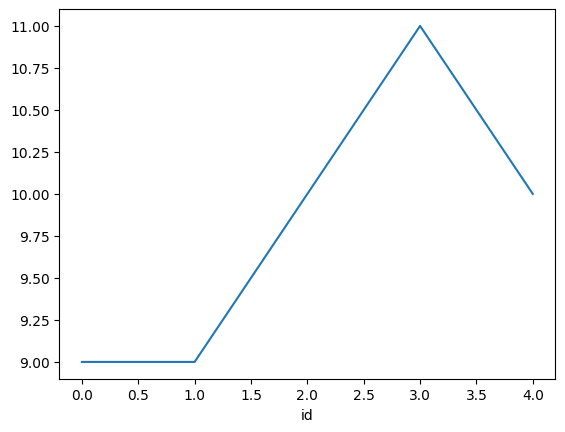

In [ ]:
students['grade'].head().plot()

This will create a line plot where the x-axis is the index of the DataFrame and the y-axis is the values in the 'age' column.

## Histogram
A histogram shows the frequency distribution of a dataset. The following code will create a histogram of the 'age' column:

Text(0, 0.5, 'Number of Students')

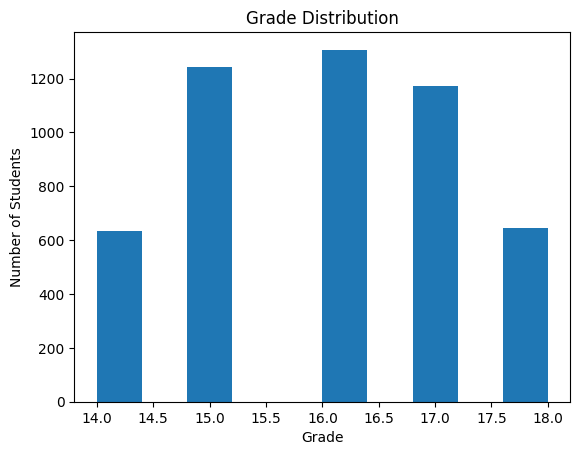

In [ ]:
students['age'].plot(kind='hist')
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Number of Students')

## Bar plot
A bar plot can be used to compare different categories. For example, if we want to compare the number of students in each grade:

Text(0, 0.5, 'Number of Students')

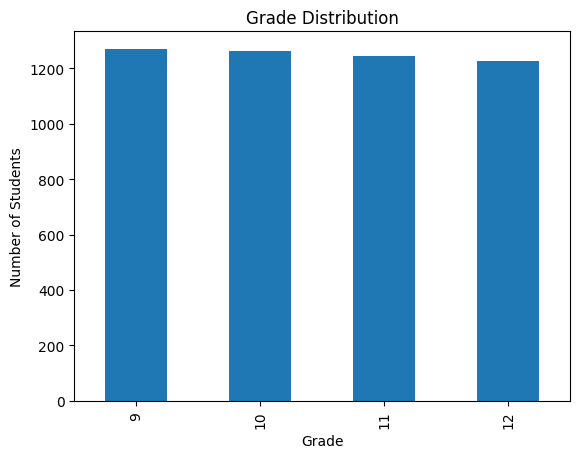

In [ ]:
students['grade'].value_counts().plot(kind='bar')
plt.title('Grade Distribution')
plt.xlabel('Grade')
plt.ylabel('Number of Students')

## Box Plot
Box plots can be used to display the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

Text(0, 0.5, 'Age')

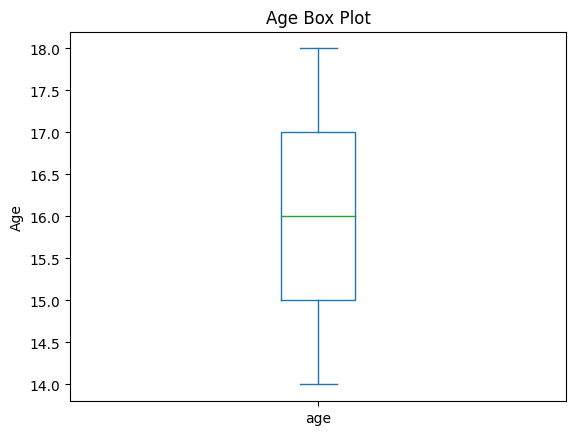

In [ ]:
students['age'].plot(kind='box')
plt.title('Age Box Plot')
plt.ylabel('Age')

Here, value_counts() is used to count the number of students in each grade, and then we use the plot function with kind='bar' to create the bar plot.